In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
noise_2018=pd.read_csv('/content/drive/MyDrive/finals/noise_data/san_salvario_2018.csv',skiprows=[0,1,2,3,4,5,6,7],delimiter=';')
noise_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    8760 non-null   object
 1   Ora     8760 non-null   object
 2   C1      8037 non-null   object
 3   C2      7418 non-null   object
 4   C3      4351 non-null   object
 5   C4      5394 non-null   object
 6   C5      8604 non-null   object
dtypes: object(7)
memory usage: 479.2+ KB


In [54]:
noise_2018.head(2)

,Data,Ora,C1,C2,C3,C4,C5
0,01-01-2018,00:00,"68,7",NaN,"76,0",NaN,"66,6"
1,01-01-2018,01:00,"68,3",NaN,"68,2",NaN,"65,4"


In [55]:
noise1=noise_2018.copy()
noise1.head(2)

,Data,Ora,C1,C2,C3,C4,C5
0,01-01-2018,00:00,"68,7",NaN,"76,0",NaN,"66,6"
1,01-01-2018,01:00,"68,3",NaN,"68,2",NaN,"65,4"


In [56]:
noise1['C1']=noise1['C1'].apply(lambda x: str(x).replace(',','.'))
noise1['C2']=noise1['C2'].apply(lambda x: str(x).replace(',','.'))
noise1['C3']=noise1['C3'].apply(lambda x: str(x).replace(',','.'))
noise1['C4']=noise1['C4'].apply(lambda x: str(x).replace(',','.'))
noise1['C5']=noise1['C5'].apply(lambda x: str(x).replace(',','.'))

In [57]:
noise1.head(2)

,Data,Ora,C1,C2,C3,C4,C5
0,01-01-2018,00:00,68.7,nan,76.0,nan,66.6
1,01-01-2018,01:00,68.3,nan,68.2,nan,65.4


In [58]:
noise1['Data']=pd.to_datetime(noise1['Data'])
noise1.head(2)

,Data,Ora,C1,C2,C3,C4,C5
0,2018-01-01,00:00,68.7,nan,76.0,nan,66.6
1,2018-01-01,01:00,68.3,nan,68.2,nan,65.4


In [59]:
noise1['C1']=noise1['C1'].apply(lambda x: float(x))
noise1['C2']=noise1['C2'].apply(lambda x: float(x))
noise1['C3']=noise1['C3'].apply(lambda x: float(x))
noise1['C4']=noise1['C4'].apply(lambda x: float(x))
noise1['C5']=noise1['C5'].apply(lambda x: float(x))

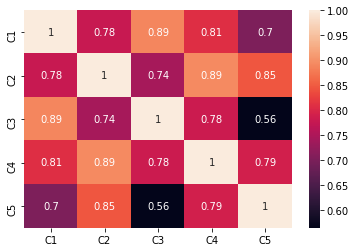

In [60]:
correlation_mat = noise1.corr()
sns.heatmap(correlation_mat, annot = True)

In [61]:
df=pd.read_csv('/content/drive/MyDrive/finals/Noise_weather_wifi_sim.csv')
df.head()

,Unnamed: 0,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm
0,0,"68,7",NaN,"76,0",NaN,"66,6",01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.600000
1,1,"68,3",NaN,"68,2",NaN,"65,4",01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.600000
2,2,"59,8",NaN,"64,4",NaN,"64,4",01-01-18 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,0.008,2.266667
3,3,"67,4",NaN,"67,5",NaN,"61,8",01-01-18 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.006,2.266667
4,4,"68,0",NaN,"64,5",NaN,"60,5",01-01-18 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780000,-0.011,2.300000


In [62]:
df['date']=df['date_hour'].apply(lambda x: x[:8])
df['hour']=df['date_hour'].apply(lambda x:x[9:])
df['date']=pd.to_datetime(df['date'])
df.head(2)

,Unnamed: 0,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm,date,hour
0,0,"68,7",NaN,"76,0",NaN,"66,6",01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.6,2018-01-01,00:00
1,1,"68,3",NaN,"68,2",NaN,"65,4",01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.6,2018-01-01,01:00


In [63]:
df=df.drop(columns=['C1','C2','C3','C4','C5','Unnamed: 0'])
df.head(2)

,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm,date,hour
0,01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.6,2018-01-01,00:00
1,01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.6,2018-01-01,01:00


In [64]:
new_df = pd.merge(noise1, df,  how='inner', left_on=['Data','Ora'], right_on = ['date','hour'])
new_df.head()

,Data,Ora,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm,date,hour
0,2018-01-01,00:00,68.7,NaN,76.0,NaN,66.6,01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.600000,2018-01-01,00:00
1,2018-01-01,01:00,68.3,NaN,68.2,NaN,65.4,01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.600000,2018-01-01,01:00
2,2018-01-01,02:00,59.8,NaN,64.4,NaN,64.4,01-01-18 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,0.008,2.266667,2018-01-01,02:00
3,2018-01-01,03:00,67.4,NaN,67.5,NaN,61.8,01-01-18 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.006,2.266667,2018-01-01,03:00
4,2018-01-01,04:00,68.0,NaN,64.5,NaN,60.5,01-01-18 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780000,-0.011,2.300000,2018-01-01,04:00


In [65]:
new_df.columns

Index(['Data', 'Ora', 'C1', 'C2', 'C3', 'C4', 'C5', 'date_hour',
       'No. of Visitors', 'index', 'cluster', 'data_a', 'numero_presenze',
       'layer_id', 'layer_nome', 'dettaglio(secondi)', 'winds', 'rainfall_mm',
       'snowfall_mm', 'date', 'hour'],
      dtype='object')

In [66]:
new_df=new_df.drop(columns=['Data','Ora'])
new_df.head()

,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm,date,hour
0,68.7,NaN,76.0,NaN,66.6,01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.600000,2018-01-01,00:00
1,68.3,NaN,68.2,NaN,65.4,01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.600000,2018-01-01,01:00
2,59.8,NaN,64.4,NaN,64.4,01-01-18 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,0.008,2.266667,2018-01-01,02:00
3,67.4,NaN,67.5,NaN,61.8,01-01-18 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.006,2.266667,2018-01-01,03:00
4,68.0,NaN,64.5,NaN,60.5,01-01-18 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780000,-0.011,2.300000,2018-01-01,04:00


In [68]:
#Fillig the null values considering means on hourly basis
new_df["C1"] = new_df.groupby("hour")['C1'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C2"] = new_df.groupby("hour")['C2'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C3"] = new_df.groupby("hour")['C3'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C4"] = new_df.groupby("hour")['C4'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C5"] = new_df.groupby("hour")['C5'].transform(lambda x: x.fillna(round(x.mean(),1)))

In [69]:
new_df.head()

,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm,date,hour
0,68.7,58.8,76.0,61.3,66.6,01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.600000,2018-01-01,00:00
1,68.3,56.7,68.2,59.6,65.4,01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.600000,2018-01-01,01:00
2,59.8,54.0,64.4,56.9,64.4,01-01-18 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,0.008,2.266667,2018-01-01,02:00
3,67.4,50.3,67.5,53.0,61.8,01-01-18 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.006,2.266667,2018-01-01,03:00
4,68.0,48.7,64.5,51.1,60.5,01-01-18 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780000,-0.011,2.300000,2018-01-01,04:00


In [70]:
new_df.isnull().sum()

C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
date_hour                 0
No. of Visitors       15672
index                  8257
cluster                8257
data_a                 8257
numero_presenze        8257
layer_id               8257
layer_nome             8257
dettaglio(secondi)     8257
winds                 15050
rainfall_mm             213
snowfall_mm             211
date                      0
hour                      0
dtype: int64

In [ ]:
#logarithmic average of the values.
#Divide each value by 10
#Apply anti log
#Add all the values
#Divide by total number of samples
#base 10 log the number and multiply it by 10
#df['C1_new']=new_df['C1'].apply(lambda x: 10**(x/10))
#df['C2_new']=new_df['C2'].apply(lambda x: 10**(x/10))
#df['C3_new']=new_df['C3'].apply(lambda x: 10**(x/10))
#df['C4_new']=new_df['C4'].apply(lambda x: 10**(x/10))
#df['C5_new']=new_df['C5'].apply(lambda x: 10**(x/10))

In [ ]:
#x1=df['C1_new'].mean()
#x2=df['C2_new'].mean()
#x3=df['C3_new'].mean()
#x4=df['C4_new'].mean()
#x5=df['C5_new'].mean()

In [ ]:
import math
#c1_log_mean=10*math.log10(x1)
#c2_log_mean=10*math.log10(x2)
#c3_log_mean=10*math.log10(x3)
#c4_log_mean=10*math.log10(x4)
#c5_log_mean=10*math.log10(x5)

In [ ]:
#new_df['C1'].fillna(round(c1_log_mean,1),inplace=True)
#new_df['C2'].fillna(round(c2_log_mean,1),inplace=True)
#new_df['C3'].fillna(round(c3_log_mean,1),inplace=True)
#new_df['C4'].fillna(round(c4_log_mean,1),inplace=True)
#new_df['C5'].fillna(round(c5_log_mean,1),inplace=True)

In [72]:
new_df['Log_Avg']=np.log10(((10**(new_df['C1']/10))+(10**(new_df['C2']/10))+(10**(new_df['C3']/10))+(10**(new_df['C4']/10))+(10**(new_df['C5']/10)))/5)*10

In [73]:
new_df.head(2)

,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),winds,rainfall_mm,snowfall_mm,date,hour,Log_Avg
0,68.7,58.8,76.0,61.3,66.6,01-01-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,-0.010,2.6,2018-01-01,00:00,70.326368
1,68.3,56.7,68.2,59.6,65.4,01-01-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,0.009,2.6,2018-01-01,01:00,65.614563


In [ ]:
new_df.to_csv('Senor_data_converted.csv')

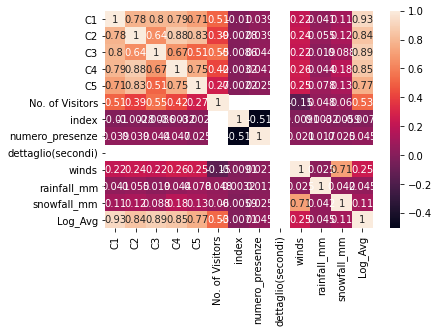

In [74]:
correlation_mat = new_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [75]:
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

C1       C1                    1.000000
         C2                    0.781390
         C3                    0.797557
         C4                    0.790605
         C5                    0.708013
                                 ...   
Log_Avg  dettaglio(secondi)         NaN
         winds                 0.246602
         rainfall_mm           0.044708
         snowfall_mm           0.106550
         Log_Avg               1.000000
Length: 169, dtype: float64


In [77]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

numero_presenze  index             -0.505284
index            numero_presenze   -0.505284
C3               C5                 0.509629
C5               C3                 0.509629
C1               No. of Visitors    0.510902
No. of Visitors  C1                 0.510902
                 Log_Avg            0.527774
Log_Avg          No. of Visitors    0.527774
C3               No. of Visitors    0.552039
No. of Visitors  C3                 0.552039
C2               C3                 0.644232
C3               C2                 0.644232
C4               C3                 0.674359
C3               C4                 0.674359
snowfall_mm      winds              0.707306
winds            snowfall_mm        0.707306
C5               C1                 0.708013
C1               C5                 0.708013
C5               C4                 0.754080
C4               C5                 0.754080
Log_Avg          C5                 0.766023
C5               Log_Avg            0.766023
C2        